In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.feature_selection import RFE, f_regression
from sklearn.linear_model import (LinearRegression, Ridge, Lasso, RandomizedLasso)
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor

In [3]:
dataset = pd.read_csv('nyc_for_ann.csv')
# X = dataset.drop(columns=['VendorID','RatecodeID','mta_tax','tolls_amount','improvement_surcharge','total_amount','payment_type','trip_type','dispatch','zone','PUT','DOT'],axis=1)
# y = dataset['zone']
# X.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1713732 entries, 0 to 1713731
Data columns (total 11 columns):
DOLocationID       int64
passenger_count    int64
trip_distance      float64
fare_amount        float64
extra              float64
tip_amount         float64
PickUp_hr          int64
TMAX               int64
day                int64
month              int64
ride_time_sec      float64
dtypes: float64(5), int64(6)
memory usage: 143.8 MB


c:\users\user\appdata\local\conda\conda\envs\tf_gpu\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
c:\users\user\appdata\local\conda\conda\envs\tf_gpu\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
c:\users\user\appdata\local\conda\conda\envs\tf_gpu\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
c:\users\user\appdata\local\conda\conda\envs\tf_gpu\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: Runtim

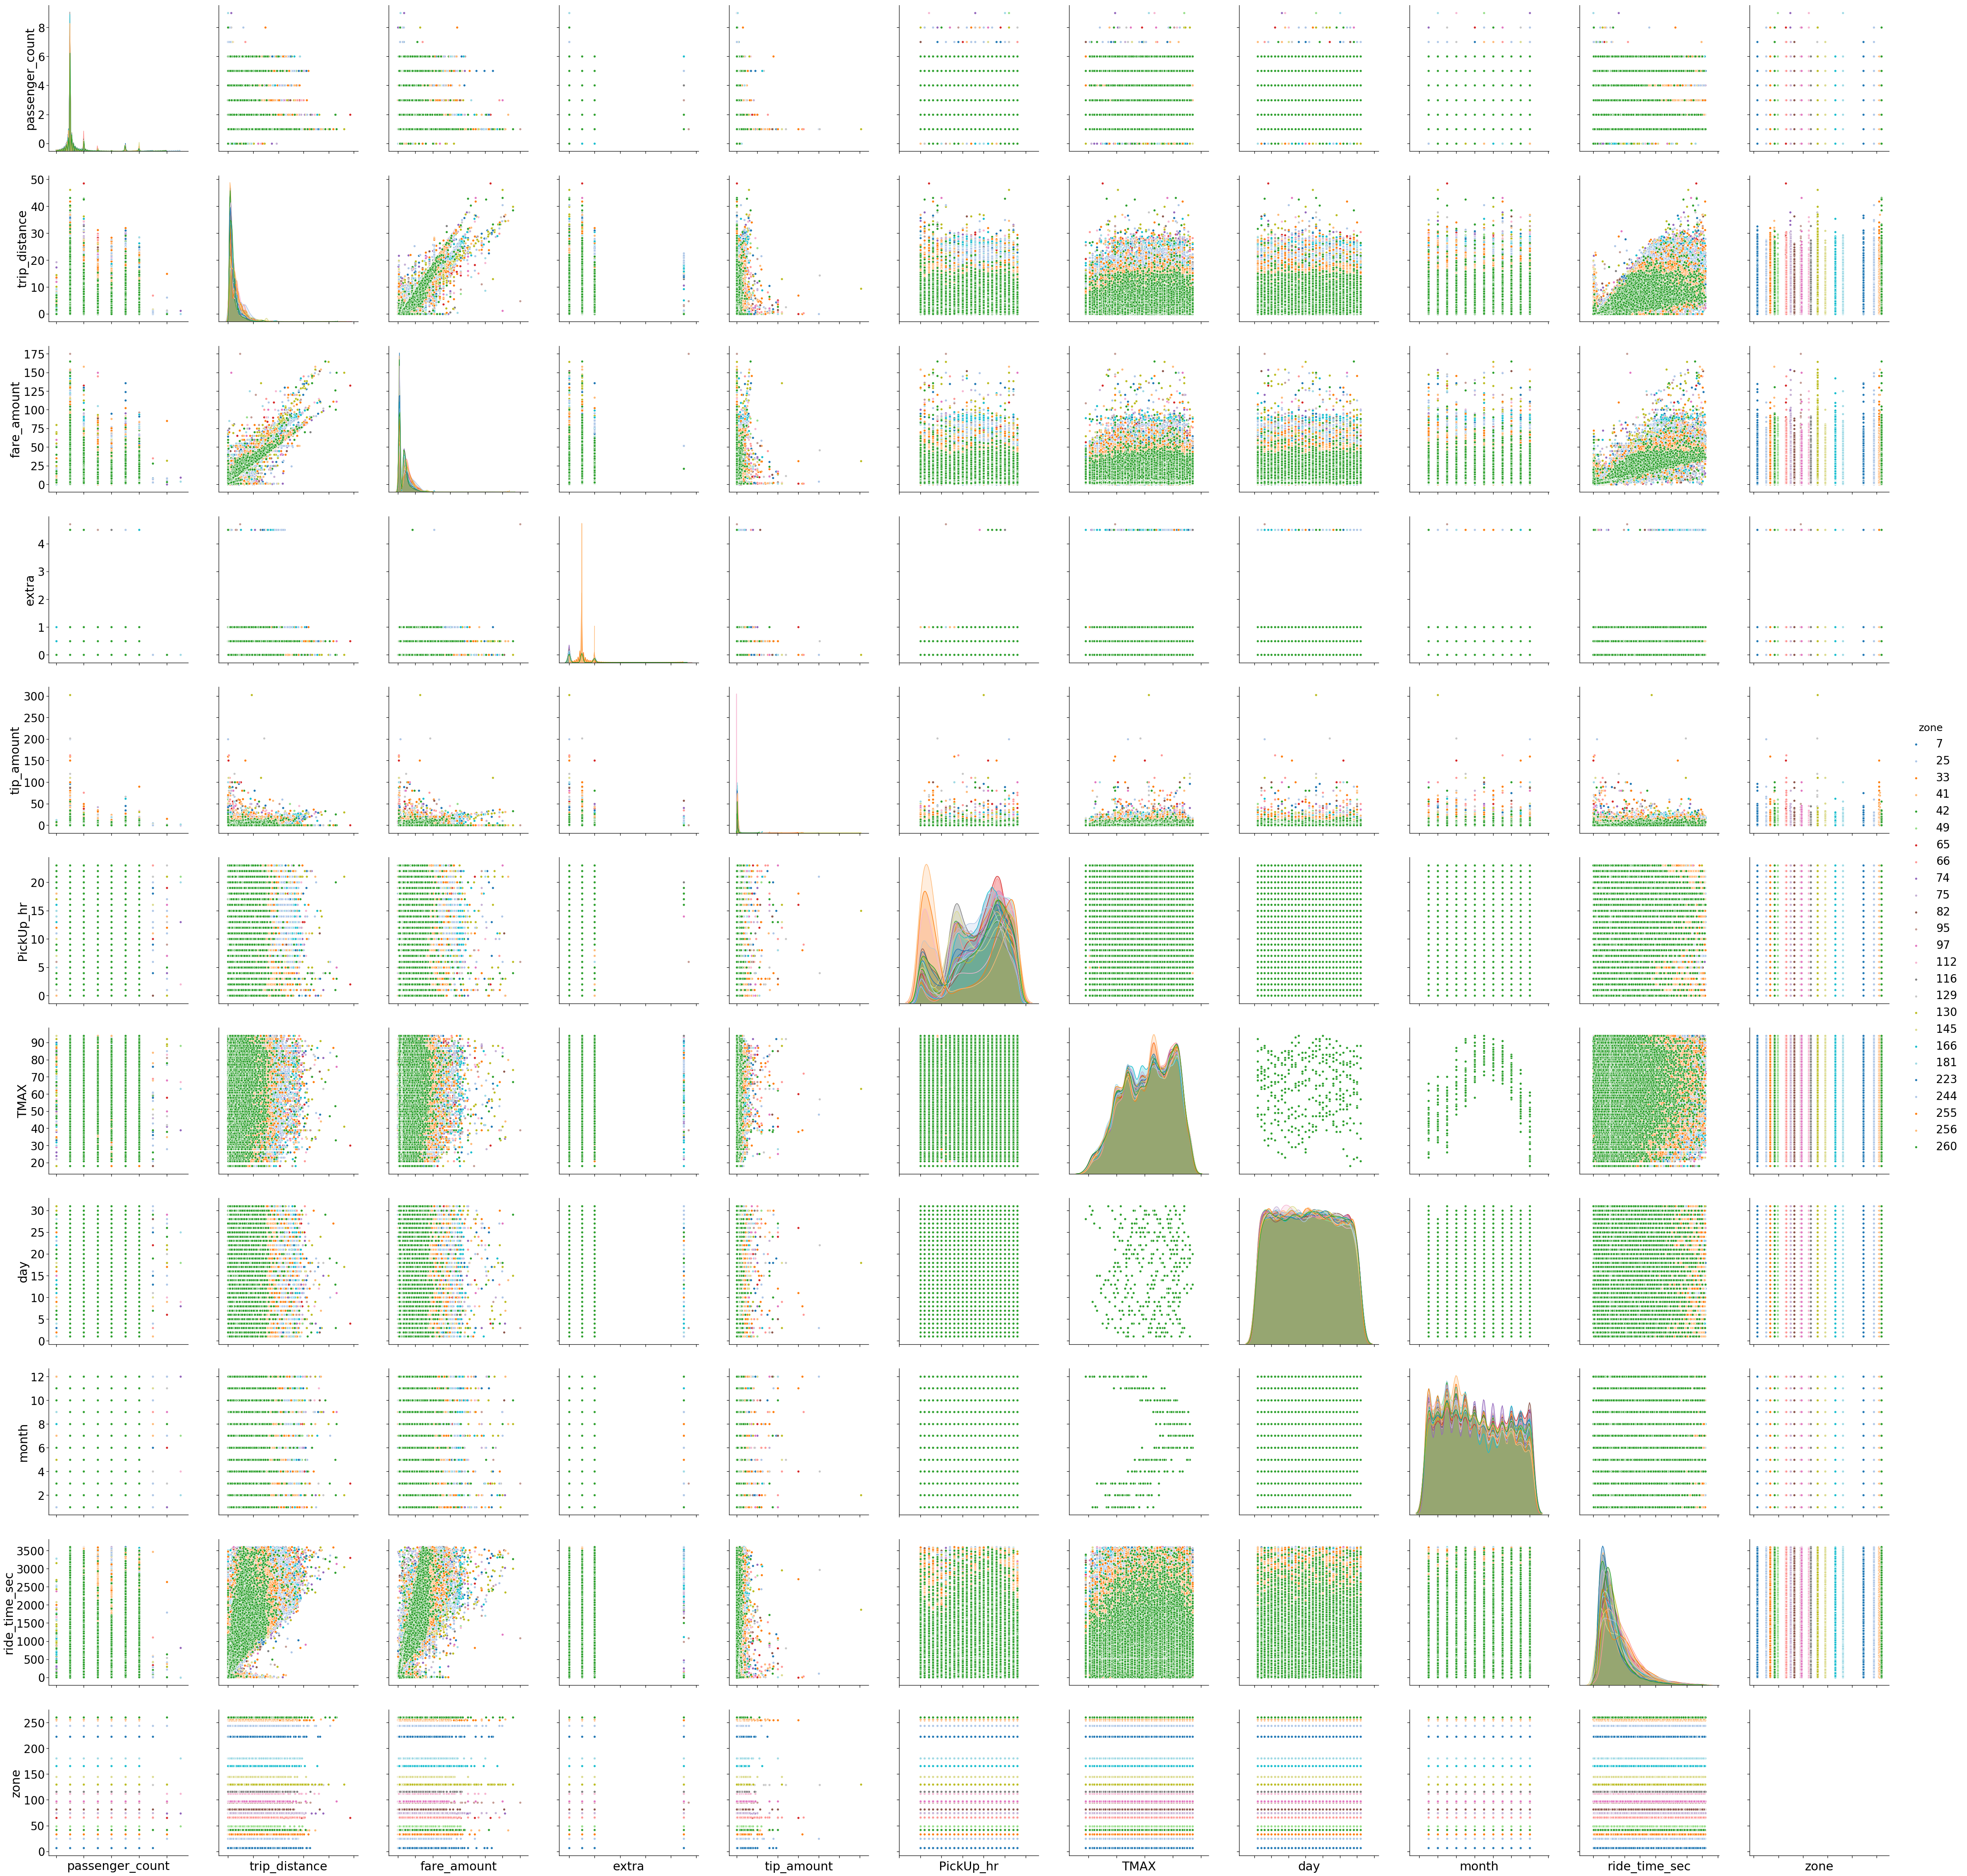

In [4]:
with sns.plotting_context("notebook",font_scale=2.5):
    g = sns.pairplot(dataset[['passenger_count','trip_distance','fare_amount','extra','tip_amount','PickUp_hr','TMAX','day',
                       'month','ride_time_sec','zone']], 
                 hue='zone', palette='tab20',size=6)
g.set(xticklabels=[]);

In [6]:
g.savefig("correlation-chart.png")

KeyboardInterrupt: 

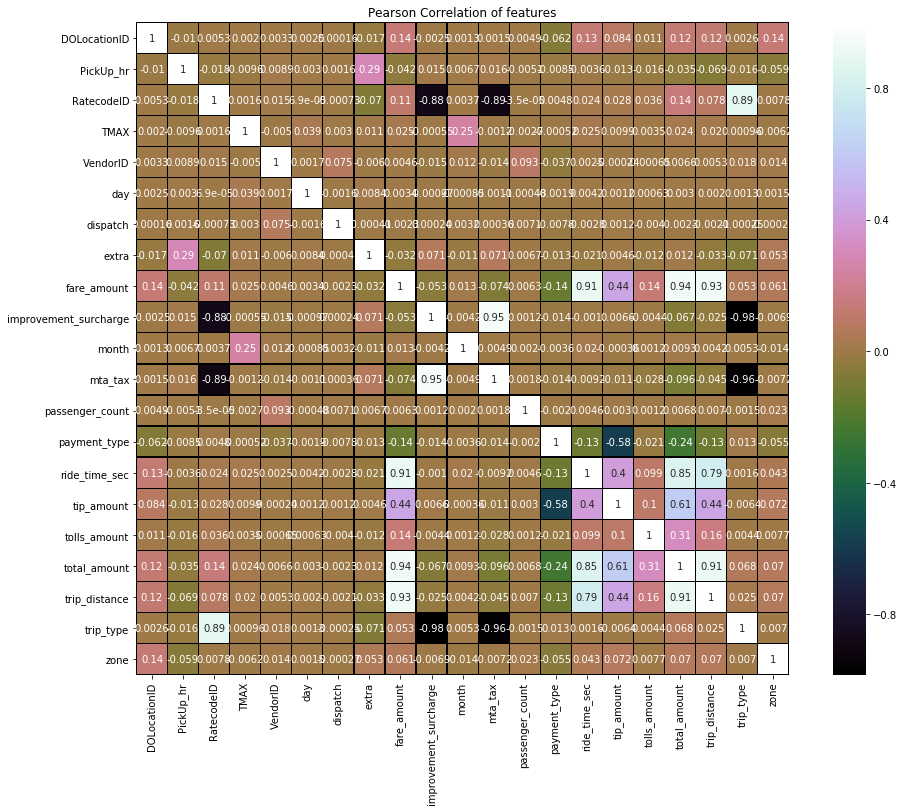

In [8]:
str_list = [] # empty list to contain columns with strings (words)
for colname, colvalue in dataset.iteritems():
    if type(colvalue[1]) == str:
         str_list.append(colname)
# Get to the numeric columns by inversion            
num_list = dataset.columns.difference(str_list) 
# Create Dataframe containing only numerical features
taxi_num = dataset[num_list]
f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation of features')
# Draw the heatmap using seaborn
#sns.heatmap(house_num.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="PuBuGn", linecolor='k', annot=True)
heatmap = sns.heatmap(taxi_num.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="cubehelix", linecolor='k', annot=True)

In [11]:
f.savefig("heatmap.png")

In [12]:
# Define dictionary to store our rankings
ranks = {}
# Create our function which stores the feature rankings to the ranks dictionary
def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))

In [16]:
X = dataset.drop(columns=['PUT','DOT','zone'],axis=1)
Y = dataset['zone']
colnames = dataset.columns
rlasso = RandomizedLasso(alpha=0.04)
rlasso.fit(X, Y)
ranks["rlasso/Stability"] = ranking(np.abs(rlasso.scores_), colnames)
print('finished')

c:\users\user\appdata\local\conda\conda\envs\tf_gpu\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class RandomizedLasso is deprecated; The class RandomizedLasso is deprecated in 0.19 and will be removed in 0.21.
  warnings.warn(msg, category=DeprecationWarning)
c:\users\user\appdata\local\conda\conda\envs\tf_gpu\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Memory is deprecated; deprecated in version 0.20.1 to be removed in version 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib.
  warnings.warn(msg, category=DeprecationWarning)
c:\users\user\appdata\local\conda\conda\envs\tf_gpu\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Parallel is deprecated; deprecated in version 0.20.1 to be removed in version 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib.
  warnings.warn(msg, category=D

c:\users\user\appdata\local\conda\conda\envs\tf_gpu\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function delayed is deprecated; deprecated in version 0.20.1 to be removed in version 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib.
  warnings.warn(msg, category=DeprecationWarning)
c:\users\user\appdata\local\conda\conda\envs\tf_gpu\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function delayed is deprecated; deprecated in version 0.20.1 to be removed in version 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib.
  warnings.warn(msg, category=DeprecationWarning)
c:\users\user\appdata\local\conda\conda\envs\tf_gpu\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function delayed is deprecated; deprecated in version 0.20.1 to be removed in version 0.23. Please import this functionality directly from 

c:\users\user\appdata\local\conda\conda\envs\tf_gpu\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function delayed is deprecated; deprecated in version 0.20.1 to be removed in version 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib.
  warnings.warn(msg, category=DeprecationWarning)
c:\users\user\appdata\local\conda\conda\envs\tf_gpu\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function delayed is deprecated; deprecated in version 0.20.1 to be removed in version 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib.
  warnings.warn(msg, category=DeprecationWarning)
c:\users\user\appdata\local\conda\conda\envs\tf_gpu\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function delayed is deprecated; deprecated in version 0.20.1 to be removed in version 0.23. Please import this functionality directly from 

c:\users\user\appdata\local\conda\conda\envs\tf_gpu\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function delayed is deprecated; deprecated in version 0.20.1 to be removed in version 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib.
  warnings.warn(msg, category=DeprecationWarning)
c:\users\user\appdata\local\conda\conda\envs\tf_gpu\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function delayed is deprecated; deprecated in version 0.20.1 to be removed in version 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib.
  warnings.warn(msg, category=DeprecationWarning)
c:\users\user\appdata\local\conda\conda\envs\tf_gpu\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function delayed is deprecated; deprecated in version 0.20.1 to be removed in version 0.23. Please import this functionality directly from 

c:\users\user\appdata\local\conda\conda\envs\tf_gpu\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function delayed is deprecated; deprecated in version 0.20.1 to be removed in version 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib.
  warnings.warn(msg, category=DeprecationWarning)
c:\users\user\appdata\local\conda\conda\envs\tf_gpu\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function delayed is deprecated; deprecated in version 0.20.1 to be removed in version 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib.
  warnings.warn(msg, category=DeprecationWarning)
c:\users\user\appdata\local\conda\conda\envs\tf_gpu\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function delayed is deprecated; deprecated in version 0.20.1 to be removed in version 0.23. Please import this functionality directly from 

c:\users\user\appdata\local\conda\conda\envs\tf_gpu\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function delayed is deprecated; deprecated in version 0.20.1 to be removed in version 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib.
  warnings.warn(msg, category=DeprecationWarning)
c:\users\user\appdata\local\conda\conda\envs\tf_gpu\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function delayed is deprecated; deprecated in version 0.20.1 to be removed in version 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib.
  warnings.warn(msg, category=DeprecationWarning)
c:\users\user\appdata\local\conda\conda\envs\tf_gpu\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function delayed is deprecated; deprecated in version 0.20.1 to be removed in version 0.23. Please import this functionality directly from 

c:\users\user\appdata\local\conda\conda\envs\tf_gpu\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function delayed is deprecated; deprecated in version 0.20.1 to be removed in version 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib.
  warnings.warn(msg, category=DeprecationWarning)
c:\users\user\appdata\local\conda\conda\envs\tf_gpu\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function delayed is deprecated; deprecated in version 0.20.1 to be removed in version 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib.
  warnings.warn(msg, category=DeprecationWarning)
c:\users\user\appdata\local\conda\conda\envs\tf_gpu\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function delayed is deprecated; deprecated in version 0.20.1 to be removed in version 0.23. Please import this functionality directly from 

c:\users\user\appdata\local\conda\conda\envs\tf_gpu\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function delayed is deprecated; deprecated in version 0.20.1 to be removed in version 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib.
  warnings.warn(msg, category=DeprecationWarning)
c:\users\user\appdata\local\conda\conda\envs\tf_gpu\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function delayed is deprecated; deprecated in version 0.20.1 to be removed in version 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib.
  warnings.warn(msg, category=DeprecationWarning)
c:\users\user\appdata\local\conda\conda\envs\tf_gpu\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function delayed is deprecated; deprecated in version 0.20.1 to be removed in version 0.23. Please import this functionality directly from 

c:\users\user\appdata\local\conda\conda\envs\tf_gpu\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function delayed is deprecated; deprecated in version 0.20.1 to be removed in version 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib.
  warnings.warn(msg, category=DeprecationWarning)
c:\users\user\appdata\local\conda\conda\envs\tf_gpu\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function delayed is deprecated; deprecated in version 0.20.1 to be removed in version 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib.
  warnings.warn(msg, category=DeprecationWarning)
c:\users\user\appdata\local\conda\conda\envs\tf_gpu\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function delayed is deprecated; deprecated in version 0.20.1 to be removed in version 0.23. Please import this functionality directly from 

finished


In [17]:
lr = LinearRegression(normalize=True)
lr.fit(X,Y)
#stop the search when only the last feature is left
rfe = RFE(lr, n_features_to_select=1, verbose =3 )
rfe.fit(X,Y)
ranks["RFE"] = ranking(list(map(float, rfe.ranking_)), colnames, order=-1)

Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.


In [18]:
# Using Linear Regression
lr = LinearRegression(normalize=True)
lr.fit(X,Y)
ranks["LinReg"] = ranking(np.abs(lr.coef_), colnames)

# Using Ridge 
ridge = Ridge(alpha = 7)
ridge.fit(X,Y)
ranks['Ridge'] = ranking(np.abs(ridge.coef_), colnames)

# Using Lasso
lasso = Lasso(alpha=.05)
lasso.fit(X, Y)
ranks["Lasso"] = ranking(np.abs(lasso.coef_), colnames)

In [19]:
rf = RandomForestRegressor(n_jobs=-1, n_estimators=50, verbose=3)
rf.fit(X,Y)
ranks["RF"] = ranking(rf.feature_importances_, colnames);

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50


[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:  1.1min


building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 50
building tree 45 of 50
building tree 46 of 50
building tree 47 of 50
building tree 48 of 50
building tree 49 of 50
building tree 50 of 50


[Parallel(n_jobs=-1)]: Done  44 out of  50 | elapsed:  4.1min remaining:   33.6s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  4.3min finished


In [21]:
del dataset

In [22]:
del X
del Y

In [25]:
# Create empty dictionary to store the mean value calculated from all the scores
r = {}
for name in colnames:
    r[name] = round(np.mean([ranks[method][name] for method in ranks.keys()]), 2)
 


KeyError: 'month'

In [26]:
meanplot = pd.DataFrame(list(r.items()), columns= ['Feature','Mean Ranking'])

# Sort the dataframe
meanplot = meanplot.sort_values('Mean Ranking', ascending=False)

c:\users\user\appdata\local\conda\conda\envs\tf_gpu\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
c:\users\user\appdata\local\conda\conda\envs\tf_gpu\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


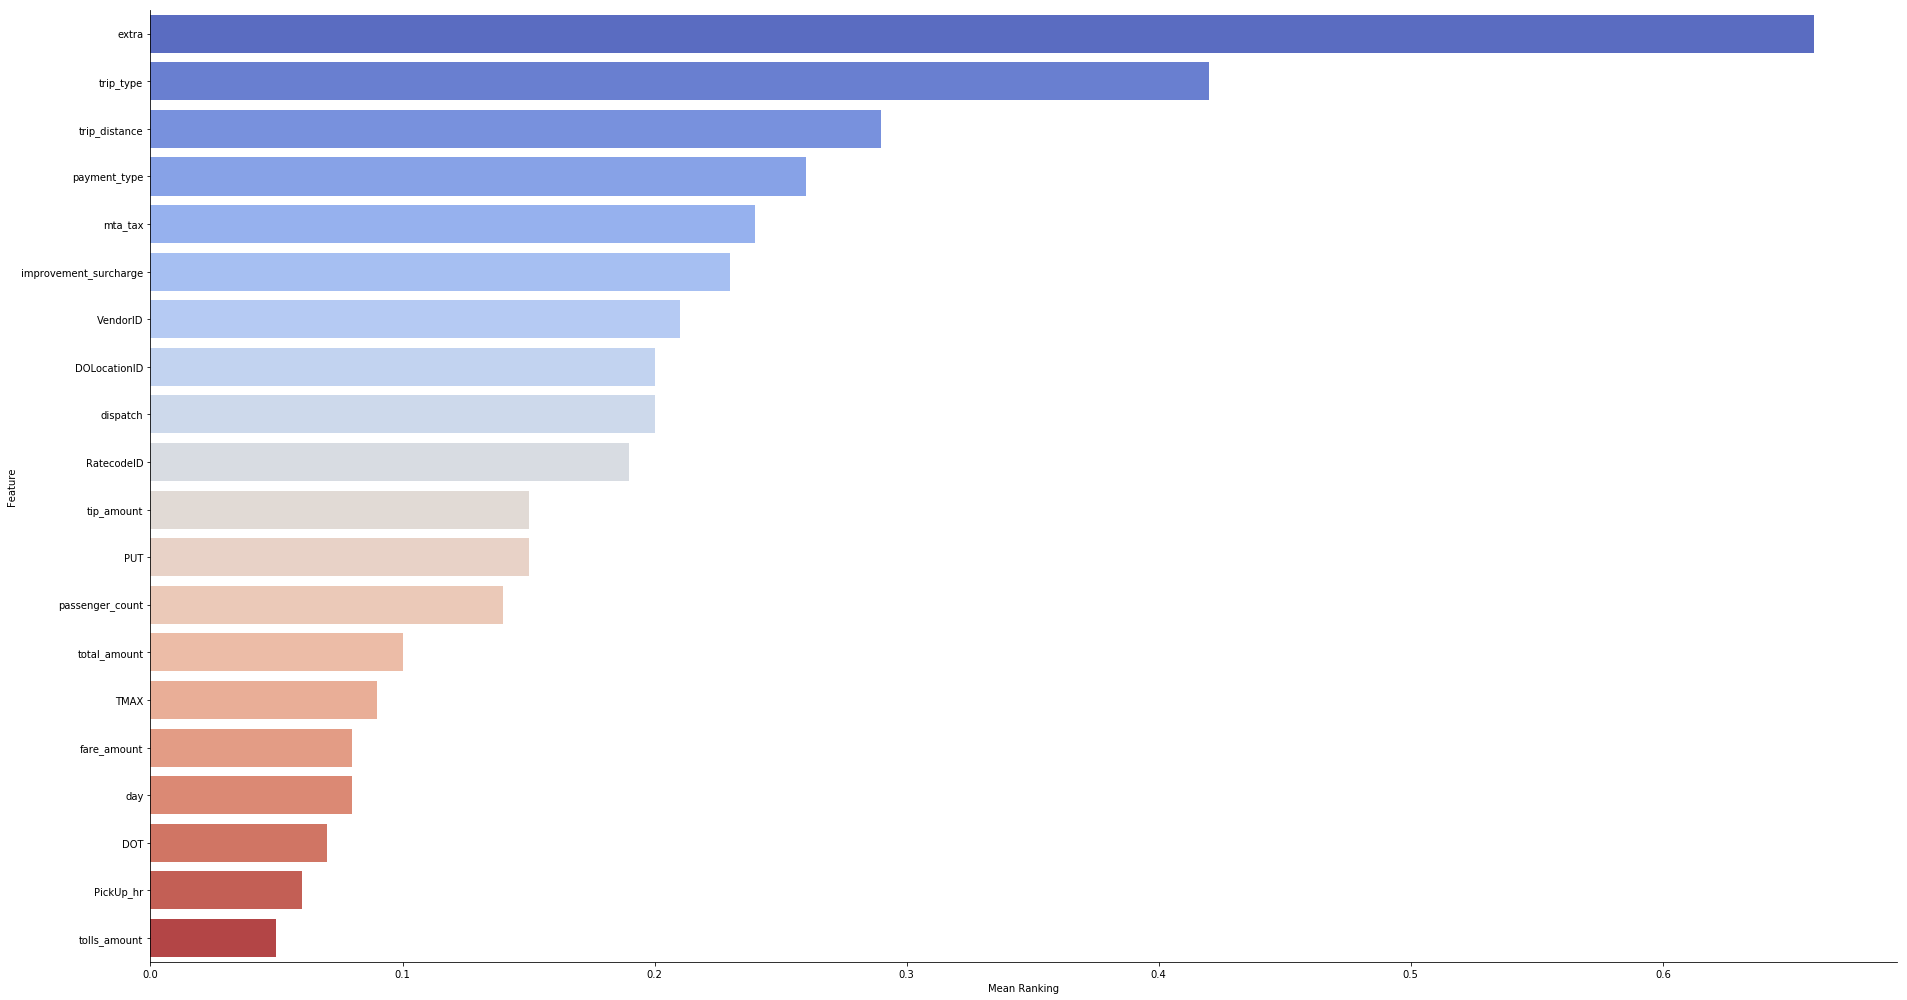

In [27]:
# Let's plot the ranking of the features
feature_ranking = sns.factorplot(x="Mean Ranking", y="Feature", data = meanplot, kind="bar", 
               size=14, aspect=1.9, palette='coolwarm')

In [28]:
feature_ranking.savefig('feature_ranking')